# Лабораторная работа №3

# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

## Цель лабораторной работы

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    * обработку пропусков в данных;
    * кодирование категориальных признаков;
    * масштабирование данных.

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных
Ссылка на датасет: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-comic-characters-dataset 

In [192]:
data = pd.read_csv('data/marvel-wikia-data.csv', sep=",")
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [142]:
# размер набора данных
data.shape

(16376, 13)

In [143]:
# типы колонок
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [144]:
# проверим есть ли пропущенные значения
data.isnull().sum()

page_id                 0
name                    0
urlslug                 0
ID                   3770
ALIGN                2812
EYE                  9767
HAIR                 4264
SEX                   854
GSM                 16286
ALIVE                   3
APPEARANCES          1096
FIRST APPEARANCE      815
Year                  815
dtype: int64

In [146]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16376


# 1. Обработка пропусков в данных


## Простые стратегии: удаление

In [147]:
data = data.dropna(axis=1, thresh=int(data.shape[0] * 0.49))

In [148]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  3770
ALIGN               2812
HAIR                4264
SEX                  854
ALIVE                  3
APPEARANCES         1096
FIRST APPEARANCE     815
Year                 815
dtype: int64

In [149]:
data[data['ALIVE'].isnull()]

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16293,541449,Mj7711,\/User:Mj7711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16329,714409,Sharjeel786,\/User:Sharjeel786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16347,462671,TOR\/test,\/User:TOR\/test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# Удаление 3 строк
data = data.drop(data.index[[16293,16329,16347]])

In [151]:
data.isnull().sum()

page_id                0
name                   0
urlslug                0
ID                  3767
ALIGN               2809
HAIR                4261
SEX                  851
ALIVE                  0
APPEARANCES         1093
FIRST APPEARANCE     812
Year                 812
dtype: int64

## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [152]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 1093, 6.67%.
Колонка Year. Тип данных float64. Количество пустых значений 812, 4.96%.


In [153]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,APPEARANCES,Year
0,4043.0,1962.0
1,3360.0,1941.0
2,3061.0,1974.0
3,2961.0,1963.0
4,2258.0,1950.0
...,...,...
16371,NaN,NaN
16372,NaN,NaN
16373,NaN,NaN
16374,NaN,NaN


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


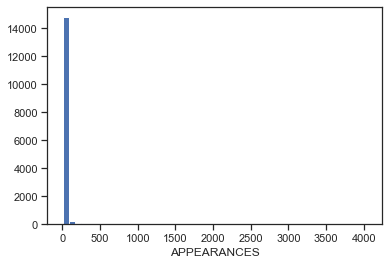

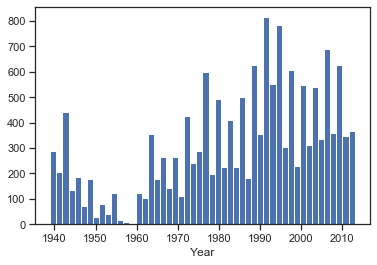

In [154]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [155]:
# Фильтр по пустым значениям поля APPEARANCES
data[data['APPEARANCES'].isnull()]

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
15280,743309,Minister of Castile D'or (Earth-616),\/Minister_of_Castile_D%27or_(Earth-616),No Dual Identity,Neutral Characters,NaN,Male Characters,Deceased Characters,NaN,Dec-39,1939.0
15281,645438,Mr. Harris' Secretary (Earth-616),\/Mr._Harris%27_Secretary_(Earth-616),No Dual Identity,Neutral Characters,Blond Hair,Female Characters,Living Characters,NaN,Oct-39,1939.0
15282,331151,N'Jaga (Earth-616),\/N%27Jaga_(Earth-616),No Dual Identity,Bad Characters,NaN,Male Characters,Living Characters,NaN,Oct-39,1939.0
15283,505986,Ertve (Earth-616),\/Ertve_(Earth-616),Secret Identity,Good Characters,White Hair,Male Characters,Living Characters,NaN,Feb-40,1940.0
15284,19657,Invisible Man (Gade) (Earth-616),\/Invisible_Man_(Gade)_(Earth-616),Secret Identity,Good Characters,NaN,Male Characters,Living Characters,NaN,Apr-40,1940.0
...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,No Hair,Male Characters,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,Male Characters,Living Characters,NaN,NaN,NaN


In [156]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['APPEARANCES'].isnull()].index
flt_index

Int64Index([15280, 15281, 15282, 15283, 15284, 15285, 15286, 15287, 15288,
            15289,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=1093)

In [157]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
15280,743309,Minister of Castile D'or (Earth-616),\/Minister_of_Castile_D%27or_(Earth-616),No Dual Identity,Neutral Characters,NaN,Male Characters,Deceased Characters,NaN,Dec-39,1939.0
15281,645438,Mr. Harris' Secretary (Earth-616),\/Mr._Harris%27_Secretary_(Earth-616),No Dual Identity,Neutral Characters,Blond Hair,Female Characters,Living Characters,NaN,Oct-39,1939.0
15282,331151,N'Jaga (Earth-616),\/N%27Jaga_(Earth-616),No Dual Identity,Bad Characters,NaN,Male Characters,Living Characters,NaN,Oct-39,1939.0
15283,505986,Ertve (Earth-616),\/Ertve_(Earth-616),Secret Identity,Good Characters,White Hair,Male Characters,Living Characters,NaN,Feb-40,1940.0
15284,19657,Invisible Man (Gade) (Earth-616),\/Invisible_Man_(Gade)_(Earth-616),Secret Identity,Good Characters,NaN,Male Characters,Living Characters,NaN,Apr-40,1940.0
...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,No Hair,Male Characters,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Bald,Male Characters,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,Male Characters,Living Characters,NaN,NaN,NaN


In [158]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['APPEARANCES']

15280   NaN
15281   NaN
15282   NaN
15283   NaN
15284   NaN
         ..
16371   NaN
16372   NaN
16373   NaN
16374   NaN
16375   NaN
Name: APPEARANCES, Length: 1093, dtype: float64

In [159]:
data_num_APPEARANCES = data_num[['APPEARANCES']]
data_num_APPEARANCES.head()

,APPEARANCES
0,4043.0
1,3360.0
2,3061.0
3,2961.0
4,2258.0


In [160]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [161]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_APPEARANCES)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [162]:
strategies=['mean', 'median','most_frequent']

In [163]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_APPEARANCES)
    return data_num_imp[mask_missing_values_only]

In [164]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([17.03337696, 17.03337696, 17.03337696, ..., 17.03337696,
        17.03337696, 17.03337696]))

In [165]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3., ..., 3., 3., 3.]))

In [166]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

Заменим все пустые данные столбца 'APPEARANCES' на данные test_num_impute(strategies[2])

In [167]:
new_APPEARANCES = pd.DataFrame({'id': flt_index,
                       'APPEARANCES':test_num_impute(strategies[2])})
new_APPEARANCES

,id,APPEARANCES
0,15280,1.0
1,15281,1.0
2,15282,1.0
3,15283,1.0
4,15284,1.0
...,...,...
1088,16371,1.0
1089,16372,1.0
1090,16373,1.0
1091,16374,1.0


In [168]:
for index, row in new_APPEARANCES.iterrows():
    data.loc[row['id'], 'APPEARANCES'] = row['APPEARANCES']
data

,page_id,name,urlslug,ID,ALIGN,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Brown Hair,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,White Hair,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Black Hair,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Black Hair,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blond Hair,Male Characters,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,No Hair,Male Characters,Living Characters,1.0,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Bald,Male Characters,Living Characters,1.0,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Bald,Male Characters,Living Characters,1.0,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,Male Characters,Living Characters,1.0,NaN,NaN


В столбце 'APPEARANCES' больше нет пропущенных данных:

In [169]:
data.isnull().sum() 

page_id                0
name                   0
urlslug                0
ID                  3767
ALIGN               2809
HAIR                4261
SEX                  851
ALIVE                  0
APPEARANCES            0
FIRST APPEARANCE     812
Year                 812
dtype: int64

### Обработка пропусков в категориальных данных

In [170]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 3767, 23.0%.
Колонка ALIGN. Тип данных object. Количество пустых значений 2809, 17.15%.
Колонка HAIR. Тип данных object. Количество пустых значений 4261, 26.02%.
Колонка SEX. Тип данных object. Количество пустых значений 851, 5.2%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 812, 4.96%.


In [171]:
cat_temp_data = data[['SEX']]
cat_temp_data.head()

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters


In [172]:
cat_temp_data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [173]:
cat_temp_data[cat_temp_data['SEX'].isnull()].shape

(851, 1)

In [174]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Male Characters'],
       ['Male Characters'],
       ['Male Characters'],
       ...,
       ['Male Characters'],
       ['Male Characters'],
       ['Male Characters']], dtype=object)

In [175]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Agender Characters', 'Female Characters',
       'Genderfluid Characters', 'Male Characters'], dtype=object)

# 2. Преобразование категориальных признаков в числовые

In [176]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
16368,Male Characters
16369,Male Characters
16370,Male Characters
16371,Male Characters


## Кодирование категорий целочисленными значениями - label encoding

In [177]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [178]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [179]:
cat_enc['c1'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters'], dtype=object)

In [180]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [181]:
le.inverse_transform([0, 1, 2, 3])

array(['Agender Characters', 'Female Characters',
       'Genderfluid Characters', 'Male Characters'], dtype=object)

# 3. Масштабирование данных

In [184]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [188]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year']])

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


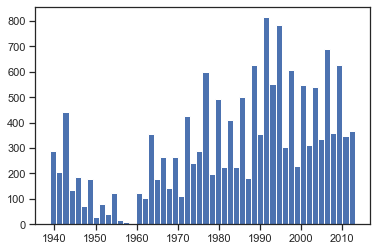

In [189]:
plt.hist(data['Year'], 50)
plt.show()

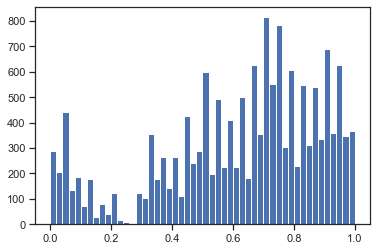

In [190]:
plt.hist(sc1_data, 50)
plt.show()